<a href="https://colab.research.google.com/github/saikishore2121/Covid19-and-Pneumonia-/blob/master/Covid_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/xinxnyn7c1pky0n/CovidDataset.zip?dl=0

--2020-08-26 05:39:02--  https://www.dropbox.com/s/xinxnyn7c1pky0n/CovidDataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xinxnyn7c1pky0n/CovidDataset.zip [following]
--2020-08-26 05:39:02--  https://www.dropbox.com/s/raw/xinxnyn7c1pky0n/CovidDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d3c0b310d08fd6294c29aee6f.dl.dropboxusercontent.com/cd/0/inline/A-Iqb6bUFUYkGLKn3btavdYCd2UHbLO0cGvfCJjcW-W6GbJwZt5XowGX3M_pNjMRrkGYtSQ_i8zC3slDmSgza1GcDvi58joladslsZ0jXoP4sLNd2muCUbE6EmwR8okhLrs/file# [following]
--2020-08-26 05:39:02--  https://uc6d3c0b310d08fd6294c29aee6f.dl.dropboxusercontent.com/cd/0/inline/A-Iqb6bUFUYkGLKn3btavdYCd2UHbLO0cGvfCJjcW-W6GbJwZt5XowGX3M_pNjMRrkGYtSQ_i8zC3slDmSgza1GcDvi58jola

In [3]:
!unzip CovidDataset.zip?dl=0

Archive:  CovidDataset.zip?dl=0
   creating: CovidDataset/
  inflating: __MACOSX/._CovidDataset  
  inflating: CovidDataset/.DS_Store  
  inflating: __MACOSX/CovidDataset/._.DS_Store  
   creating: CovidDataset/Train/
  inflating: __MACOSX/CovidDataset/._Train  
   creating: CovidDataset/Val/
  inflating: __MACOSX/CovidDataset/._Val  
  inflating: CovidDataset/Train/.DS_Store  
  inflating: __MACOSX/CovidDataset/Train/._.DS_Store  
   creating: CovidDataset/Train/Pneumonia/
   creating: CovidDataset/Train/Normal/
  inflating: __MACOSX/CovidDataset/Train/._Normal  
   creating: CovidDataset/Train/Covid/
  inflating: __MACOSX/CovidDataset/Train/._Covid  
  inflating: CovidDataset/Val/.DS_Store  
  inflating: __MACOSX/CovidDataset/Val/._.DS_Store  
   creating: CovidDataset/Val/Pneumonia/
   creating: CovidDataset/Val/Normal/
  inflating: __MACOSX/CovidDataset/Val/._Normal  
   creating: CovidDataset/Val/Covid/
  inflating: __MACOSX/CovidDataset/Val/._Covid  
  inflating: CovidDataset/Tra

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
training_path='CovidDataset/Train'
val_path='CovidDataset/Val'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights requires GPU
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
folders=glob('CovidDataset/Train/*')

In [8]:
flat=Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(flat)

In [10]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('CovidDataset/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 336 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
11/11 [==============================] - 12s 1s/step - loss: 0.8406 - accuracy: 0.6399 - val_loss: 0.2759 - val_accuracy: 0.8889
Epoch 2/5
11/11 [==============================] - 10s 941ms/step - loss: 0.2128 - accuracy: 0.9196 - val_loss: 0.3314 - val_accuracy: 0.8667
Epoch 3/5
11/11 [==============================] - 10s 880ms/step - loss: 0.1404 - accuracy: 0.9554 - val_loss: 0.1960 - val_accuracy: 0.9333
Epoch 4/5
11/11 [==============================] - 10s 887ms/step - loss: 0.1134 - accuracy: 0.9732 - val_loss: 0.1724 - val_accuracy: 0.9333
Epoch 5/5
11/11 [==============================] - 9s 862ms/step - loss: 0.0806 - accuracy: 0.9821 - val_loss: 0.1546 - val_accuracy: 0.9333


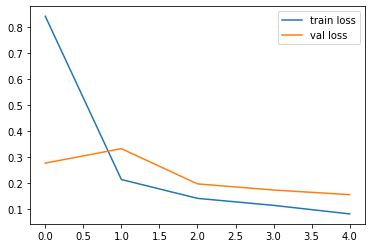

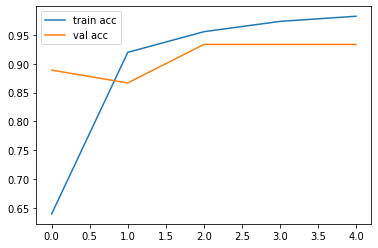

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')